In [39]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


%matplotlib inline

"""
There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)
"""

In [40]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [4]:
df.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  

In [41]:
#change column name for maintaining consistency and long name
df = df.rename(columns={'default.payment.next.month': 'pred_pay', 
                        'PAY_0': 'PAY_1'})

In [42]:
df["pred_pay"].value_counts() # 1=yes, 0=no

0    23364
1     6636
Name: pred_pay, dtype: int64

In [43]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pred_pay'],
      dtype='object')

In [44]:
X = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
Y = df[['pred_pay']]
print(X.shape)
print(Y.shape)

(30000, 23)
(30000, 1)


In [45]:
# data cleaning 
for i, element in enumerate(df['AGE']):
    df.loc[i,'AGE2']= str(element)[0]

df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

In [46]:
df.groupby('SEX',as_index=False)['pred_pay'].count()

,SEX,pred_pay
0,1,11888
1,2,18112


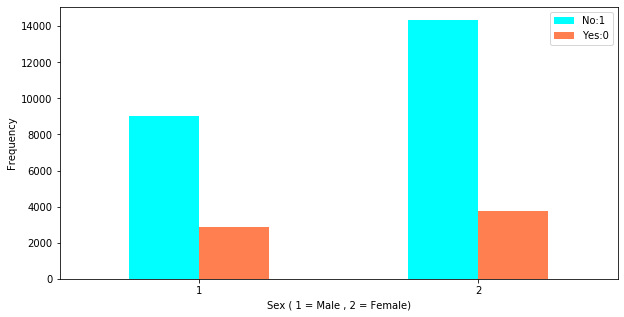

In [47]:
pd.crosstab(df.SEX,df.pred_pay).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex ( 1 = Male , 2 = Female)')
plt.xticks(rotation=0)
plt.legend(["No:1", "Yes:0"])
plt.ylabel('Frequency')
plt.show()

In [48]:

df.EDUCATION.value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [49]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4

Text(0.5, 1.0, 'Education outliter by pred_pay')

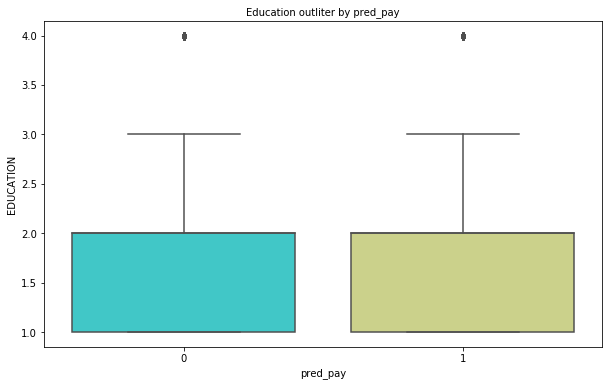

In [50]:
#OUTLIER
plt.figure(figsize=(10,6))
sns.boxplot(df['pred_pay'], df['EDUCATION'], palette = 'rainbow')
plt.title('Education outliter by pred_pay', fontsize = 10)

In [51]:

df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

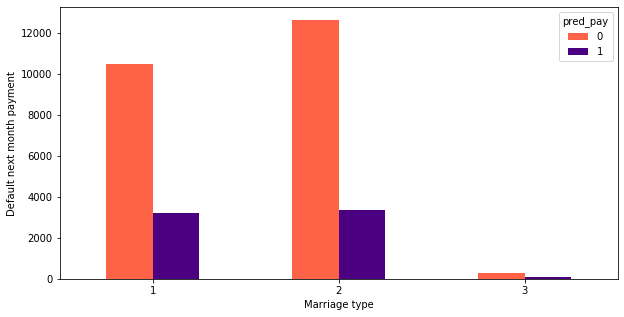

In [52]:
pd.crosstab(df.MARRIAGE,df.pred_pay).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Marriage type')
plt.xticks(rotation = 0)
plt.ylabel('Default next month payment')
plt.show()

In [53]:
df.groupby('AGE2',as_index=False)['pred_pay'].count()

,AGE2,pred_pay
0,2,9618
1,3,11238
2,4,6464
3,5,2341
4,6,314
5,7,25


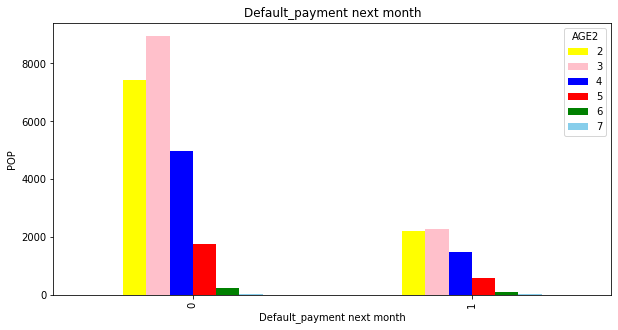

In [54]:
pd.crosstab(df.pred_pay , df.AGE2).plot(kind="bar",figsize=(10,5),color=['YELLOW','PINK','blue','red','green','skyblue','grey' ])
plt.title('Default_payment next month') #
plt.xlabel('Default_payment next month')
plt.ylabel('POP')
plt.show()

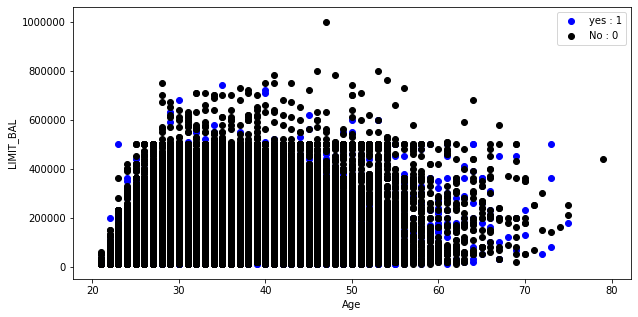

In [55]:
plt.figure(figsize=(10,5))
plt.scatter(x=df.AGE[df.pred_pay==1],y=df.LIMIT_BAL[df.pred_pay==1],c='blue')
plt.scatter(x=df.AGE[df.pred_pay==0],y=df.LIMIT_BAL[df.pred_pay==0],c='black')
plt.xlabel('Age')
plt.ylabel('LIMIT_BAL')
plt.legend(['yes : 1','No : 0'])

plt.show()

In [56]:
df_copy = df.copy()
SEX_DUM =pd.get_dummies(df['SEX'],prefix='SEX',drop_first=True)
EDUCATION_DUM=pd.get_dummies(df['EDUCATION'],prefix='EDUCATION')
AGE2_DUM=pd.get_dummies(df['AGE2'],prefix='AGE2')
MARRIAGE_DUM=pd.get_dummies(df['MARRIAGE'],prefix='MARRIAGE')


frames=[df_copy,SEX_DUM,EDUCATION_DUM,AGE2_DUM,MARRIAGE_DUM]
df_copy=pd.concat(frames,axis=1)
df_copy.drop(['SEX','EDUCATION','AGE2','MARRIAGE'],axis=1,inplace=True)

In [57]:
#train the model with 90% + 10%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=1234)
print("train x  "  , X_train.shape)
print("train y  "  , y_train.shape)
print("test x  "  , X_test.shape)
print("test y  "  , y_test.shape)

#train the model with 10% = 5% + 5%
X_test_accuracy, X_test_remain, y_test_accuracy, y_test_remain = train_test_split(X_test, y_test, test_size=0.50, random_state=1234)
print("X_test_accuracy x  "  , X_test_accuracy.shape)
print("y_test_accuracy y  "  , y_test_accuracy.shape)


train x   (27000, 23)
train y   (27000, 1)
test x   (3000, 23)
test y   (3000, 1)
X_test_accuracy x   (1500, 23)
y_test_accuracy y   (1500, 1)


In [58]:
classifier = DecisionTreeClassifier(random_state=100) 
classifier.fit(X_train, y_train)
print("train set accuracy" , format(classifier.score(X_train, y_train)))
print("test set accuracy" , format(classifier.score(X_test, y_test)))
print("test accuracy set accuracy" , format(classifier.score(X_test_accuracy, y_test_accuracy)))
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

predictions1 = classifier.predict(X_test_accuracy)
accuracy_score(y_true = y_test_accuracy, y_pred = predictions1)

train set accuracy 0.9993703703703704
test set accuracy 0.713
test accuracy set accuracy 0.7046666666666667


0.7046666666666667

In [59]:
classifier.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')>

In [73]:
train_result = []
test_result  = []
model_criterion = []
model_max_depth = []
parameter_min_leaf = []

insert_criterion = ['gini','entropy']
max_depth = 30
list_min_leaf = [i for i in range(1,7)]
for i in insert_criterion:
    for n in list_min_leaf:
        tree = DecisionTreeClassifier(criterion=i,max_depth=max_depth,min_samples_leaf=n,random_state = 1000)
        tree.fit(X_train, y_train)
        train_result.append(tree.score(X_train, y_train))
        test_result.append(tree.score(X_test,y_test))
        model_criterion.append(i)
        model_max_depth.append(max_depth)
        parameter_min_leaf.append(n)

result = pd.DataFrame()
result['Criterion'] = model_criterion
result['Depth'] = max_depth
result['MinLeafSize'] = parameter_min_leaf
result['TrainAccuracy'] = train_result
result['TestAccuracy'] = test_result
result

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,30,1,0.985778,0.731667
1,gini,30,2,0.956556,0.736667
2,gini,30,3,0.936333,0.726667
3,gini,30,4,0.917407,0.740667
4,gini,30,5,0.903741,0.740667
5,gini,30,6,0.891593,0.748333
6,entropy,30,1,0.988481,0.724667
7,entropy,30,2,0.963370,0.744667
8,entropy,30,3,0.948407,0.736667
9,entropy,30,4,0.929000,0.738333


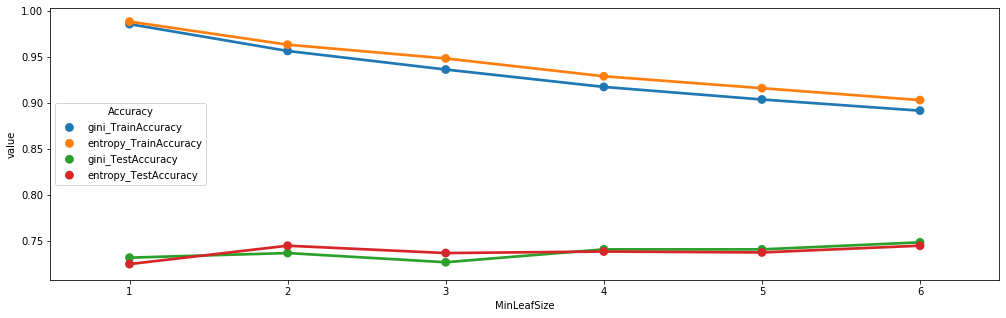

In [85]:
#to visualize by using melt function for finding accuracy of test and train
fig, axs = plt.subplots(figsize=(17, 5))
result_melt = pd.melt(result, id_vars=['Criterion','Depth','MinLeafSize'])
result_melt['Accuracy'] =  result_melt['Criterion']+'_'+result_melt['variable']
sns.pointplot(data=result_melt,x='MinLeafSize',y='value',hue='Accuracy')

In [62]:
#it seems Entropy model get fitting.

In [74]:
model = DecisionTreeClassifier(criterion='gini',max_depth=30,min_samples_leaf=9,random_state = 1000)
model.fit(X_train, y_train)
print("train set accuracy" , format(model.score(X_train, y_train)))
print("test set accuracy" , format(model.score(X_test, y_test)))

train set accuracy 0.8712962962962963
test set accuracy 0.759


In [75]:
"""
from sklearn import tree
import graphviz 
from graphviz import Graph
dot_data = tree.export_graphviz(model,out_file=None,feature_names=X.columns,
                                impurity = False, filled = True,class_names=['0','1'])
graph = graphviz.Source(dot_data)  
#g = Graph(format='png')
#graph
"""
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('my_decision_tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.44342 to fit



True

In [76]:
#print(df.describe())

In [77]:
df_copy.head(5)

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_4,AGE2_2,AGE2_3,AGE2_4,AGE2_5,AGE2_6,AGE2_7,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0,1,0,0,0,0,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,0,1,0,0,0,0,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,0,1,0,0,0,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,0,1,0,0,0,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,0,0,0,0,1,0,0,1,0,0


In [78]:
X = df_copy.drop(['pred_pay'], axis = 1)
y = df_copy.pred_pay.values

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)
X_test_accuracy, X_test, X_test_accuracy, y_test = train_test_split(X_test, y_test, test_size = 0.50, random_state = 0)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [81]:
df_copy.count()
df_copy.dropna()
import tensorflow as tf

In [82]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [83]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
#classifier.add(Dense(output_dim = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))


classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 35))
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [84]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\maiji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
27000/27000 [==============================] - 4s 131us/step - loss: 0.4889 - accuracy: 0.7784
Epoch 2/100
27000/27000 [==============================] - 3s 128us/step - loss: 0.4710 - accuracy: 0.8011
Epoch 3/100
27000/27000 [==============================] - 4s 131us/step - loss: 0.4684 - accuracy: 0.8070
Epoch 4/100
27000/27000 [==============================] - 3s 122us/step - loss: 0.4674 - accuracy: 0.8083
Epoch 5/100
27000/27000 [==============================] - 3s 129us/step - loss: 0.4668 - accuracy: 0.8096
Epoch 6/100
27000/27000 [==============================] - 3s 125us/step - loss: 0.4654 - accuracy: 0.8091
Epoch 7/100
27000/27000 [==============================] - 4s 131us/step - loss: 0.4582 - accuracy: 0.8155
Epoch 8/100
27000/27000 [==============================] - 4s 146us/step - loss: 0.4492 - accuracy: 0.8176
Epoch 9/100
27000/27000 [==============================] - 6s 210us/step - loss: 0.4438 - accuracy: 0.8182
Epoch 10/100
27000/27000 [===========

27000/27000 [==============================] - 4s 139us/step - loss: 0.4291 - accuracy: 0.8217
Epoch 77/100
27000/27000 [==============================] - 4s 143us/step - loss: 0.4288 - accuracy: 0.8213
Epoch 78/100
27000/27000 [==============================] - 4s 137us/step - loss: 0.4292 - accuracy: 0.8206
Epoch 79/100
27000/27000 [==============================] - 4s 132us/step - loss: 0.4291 - accuracy: 0.8211
Epoch 80/100
27000/27000 [==============================] - 4s 132us/step - loss: 0.4287 - accuracy: 0.8217
Epoch 81/100
27000/27000 [==============================] - 3s 128us/step - loss: 0.4281 - accuracy: 0.8220
Epoch 82/100
27000/27000 [==============================] - 4s 130us/step - loss: 0.4281 - accuracy: 0.8219
Epoch 83/100
27000/27000 [==============================] - 4s 142us/step - loss: 0.4284 - accuracy: 0.8213
Epoch 84/100
27000/27000 [==============================] - 4s 144us/step - loss: 0.4282 - accuracy: 0.8223
Epoch 85/100
27000/27000 [===============